# 1.0 - PASSO 1 - ENTENDENDO DO NEGÓCIO DA EMPRESA

A empresa All in One é um outlet de roupas multimarcas que comercializa produtos de segunda linha a preços reduzidos através de um e-commerce. Seu modelo de negócio é baseado na venda online de produtos fora de linha de várias marcas, oferecendo itens de marcas conhecidas a preços acessíveis para consumidores que buscam qualidade com custo-benefício. As principais métricas e KPIs do negócio incluem receita total, monitorada por relatórios financeiros, margem de lucro bruta, analisada por custos e preços de venda, taxa de conversão, acompanhada por ferramentas de análise web, ticket médio, registrado em relatórios de vendas, frequência de compra, analisada pelo comportamento dos clientes, valor do tempo de vida do cliente (CLV), previsto por modelos baseados em dados históricos, taxa de retenção de clientes, observada pela análise de clientes ativos e inativos, taxa de aquisição de novos clientes, monitorada por campanhas de marketing e registros no site, e custo de aquisição de novos clientes (CAC), analisado por relatórios financeiros e de marketing. As estratégias para aumentar o faturamento incluem a melhoria da experiência do usuário com otimização do site e atendimento eficiente, implementação do programa de fidelidade “Insiders” para incentivar compras repetidas, campanhas de marketing digital, expansão de produtos e marcas através de parcerias estratégicas, utilização de análises avançadas para entender padrões de compra e segmentação de clientes para campanhas personalizadas, além de promoções e ofertas sazonais planejadas em datas comemorativas e períodos de menor movimento.

# 2.0 - PASSO 2 - ENTENDENDO O PROBLEMA DE NEGÓCIO

A All in One é um outlet multimarcas que vende produtos de segunda linha a preços reduzidos por e-commerce. O time de marketing identificou que alguns clientes compram produtos mais caros com frequência, contribuindo significativamente para o faturamento. Assim, desejam lançar o programa de fidelidade "Insiders" para recompensar esses clientes. A causa raiz é a necessidade de segmentar a base de clientes para identificar os de maior valor. O time de marketing é o responsável pelo programa. A solução envolve análise de dados e machine learning, incluindo análise RFM e clusterização, com um dashboard interativo para monitoramento. O problema envolve estratégias de marketing baseadas em previsão de comportamento, utilizando métodos de análise estatística, machine learning e mineração de dados. O resultado será entregue em um relatório executivo com um dashboard interativo.

# 3.0 - PASSO 3 - COLETANDO E IMPORTANDO OS DADOS

## 3.1 - IMPORTS

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import re

import umap.umap_ as umap

from IPython.display import HTML
from matplotlib import pyplot as plt

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from plotly import express as px
from datetime import datetime
from tabulate import tabulate

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

/home/emersds/.pyenv/versions/3.12.3/envs/env_insiders/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3.2 - Funções Auxiliadoras

In [2]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

## 3.3 - LOADING DATA

In [3]:
# Carregando o arquivo CSV usando caminho relativo
df = pd.read_csv('dataset/data.csv', encoding='latin1')

# 4.0 - PASSO 4 - ANÁLISE DESCRITIVA - DESCREVENDO OS DADOS

In [4]:
# Criando uma cópia do DataFrame para a boa prática
df1 = df.copy()

In [5]:
# Verificando as primeiras linhas do DataFrame
df1.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 4.1 - Renomeando as Colunas

In [6]:
# Renomenando colunas para facilitar a manipulação
df1.rename(columns={'InvoiceNo': 'invoice_number', 'StockCode': 'stock_code', 
                     'Description': 'product_description', 'Quantity': 'quantity',
                     'InvoiceDate': 'invoice_date', 'UnitPrice': 'unit_price', 
                     'CustomerID': 'customer_id', 'Country': 'country'}, inplace=True)

df1.columns

Index(['invoice_number', 'stock_code', 'product_description', 'quantity',
       'invoice_date', 'unit_price', 'customer_id', 'country'],
      dtype='object')

## 4.2 - Dimensão dos dados

In [7]:
# mostrando a quantidade de linhas e colunas do dataframe
print(f'O dataset contém {df1.shape[0]} linhas e {df1.shape[1]} colunas.')

O dataset contém 541909 linhas e 8 colunas.


## 4.3 - Tipo de dados

In [8]:
# checando os tipos de dados de cada coluna
df1.dtypes

invoice_number          object
stock_code              object
product_description     object
quantity                 int64
invoice_date            object
unit_price             float64
customer_id            float64
country                 object
dtype: object

### 4.3.1 - Modificando os tipos de dados

In [9]:
# Modificando o tipo de dado da coluna 'customer_id'
df1['customer_id'] = df1['customer_id'].astype(float).astype('Int64')

# Modificando o tipo de dado da coluna 'unit_price'
df1['unit_price'] = df1['unit_price'].astype(float)

In [10]:
# Remover a hora, mantendo apenas a data
df1['invoice_date'] = df1['invoice_date'].str.split().str[0]

# Converter para datetime
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%m/%d/%Y')

In [11]:
# Remover a letras dos valores na coluna 'invoice_number'
df1['invoice_number'] = df1['invoice_number'].str.replace(r'\D', '', regex=True)

# Substituindo valores em branco por NaN na coluna 'invoice_number'
df1['invoice_number'] = df1['invoice_number'].replace('', np.nan)

# Converter a coluna 'invoice_number' para float e depois para Int64
df1['invoice_number'] = df1['invoice_number'].astype(float).astype('Int64')

In [12]:
# Remover a letras dos valores na coluna 'stock_code'
df1['stock_code'] = df1['stock_code'].str.replace(r'\D', '', regex=True)

# Substituindo valores em branco por NaN na coluna 'stock_code'
df1['stock_code'] = df1['stock_code'].replace('', np.nan)

# Converter a coluna 'stock_code' para float e depois para Int64
df1['stock_code'] = df1['stock_code'].astype(float).astype('Int64')

In [13]:
# checando se os tipos de dados de cada coluna foram corretamente modificados
df1.dtypes

invoice_number                  Int64
stock_code                      Int64
product_description            object
quantity                        int64
invoice_date           datetime64[ns]
unit_price                    float64
customer_id                     Int64
country                        object
dtype: object

In [14]:
df1.head(2)

,invoice_number,stock_code,product_description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom


In [15]:
df1.isna().sum()

invoice_number              0
stock_code               2796
product_description      1454
quantity                    0
invoice_date                0
unit_price                  0
customer_id            135080
country                     0
dtype: int64

## 4.4 - Checando NAs

In [16]:
# verificando a existência de valores ausentes e a proporção de dados faltantes
missing_values = df1.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({'Total de Valores Faltantes': missing_values, 'Porcentagem': missing_percentage})
missing_df

,Total de Valores Faltantes,Porcentagem
invoice_number,0,0.000000
stock_code,2796,0.515954
product_description,1454,0.268311
quantity,0,0.000000
invoice_date,0,0.000000
unit_price,0,0.000000
customer_id,135080,24.926694
country,0,0.000000


### 4.1.1 - Replace NAs
<p>Recuperar o customer_id pela invoice_number - criando novos ids para aquelas compras.

Retirar esses dados quando for passar para o time de negócios, pois são clientes que não são identificavéis, mas possuem carcatéristicas</p>

In [17]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [18]:
# Criando um DataFrame de Referência para as linhas com customer_id em branco
df_backup = pd.DataFrame( df_missing['invoice_number'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1)

# merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on='invoice_number', how='left' )

# coalesce 
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [19]:
# Checando se os valores ausentes da custimer_id foram tratados
df1.isna().sum()

invoice_number            0
stock_code             2796
product_description    1454
quantity                  0
invoice_date              0
unit_price                0
country                   0
customer_id               0
dtype: int64

In [20]:
# Removendo os NAs da coluna 'product_description' 
# Como a representatividade dos dados é muito pequena.
# Em um primeiro momento, ptamos por remover os valores ausentes
df1 = df1.dropna(subset=['product_description'])

In [21]:
# Checando se os valores ausentes da product_description foram tratados
df1.isna().sum()

invoice_number            0
stock_code             2791
product_description       0
quantity                  0
invoice_date              0
unit_price                0
country                   0
customer_id               0
dtype: int64

In [22]:
# Removendo os NAs da coluna 'stock_code' 
# Como a representatividade dos dados é muito pequena.
# Em um primeiro momento, ptamos por remover os valores ausentes
df1 = df1.dropna(subset=['stock_code'])

In [23]:
# Checando se os valores ausentes da stcok_code foram tratados
df1.isna().sum()

invoice_number         0
stock_code             0
product_description    0
quantity               0
invoice_date           0
unit_price             0
country                0
customer_id            0
dtype: int64

## 4.5 - Estatística Descritiva

In [24]:
# # Identificando outliers
# for col in df1.select_dtypes(include=[np.number]).columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df1[col])
#     plt.title(f'Boxplot de {col}')
#     plt.show()

In [25]:
# Estátistica Descritiva
num_attributes = df1.select_dtypes(include=['int64', 'float64', 'Int64'])

cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'Int64'])

### 4.5.1 - Atributos numéricos

In [26]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,invoice_number,536365.0,581587.0,45222.0,559968.696290,560692.00,13427.659257,-0.109180,-1.249856
1,stock_code,2.0,90214.0,90212.0,31473.013004,22639.00,21456.154031,1.982245,2.095168
2,quantity,-80995.0,80995.0,161990.0,9.642444,3.00,218.534077,-0.281853,119715.584277
3,unit_price,0.0,649.5,649.5,3.291017,2.08,4.563428,24.957410,2075.204339
4,customer_id,12346.0,22709.0,10363.0,16680.644354,16242.00,2902.615876,0.496480,-0.786344


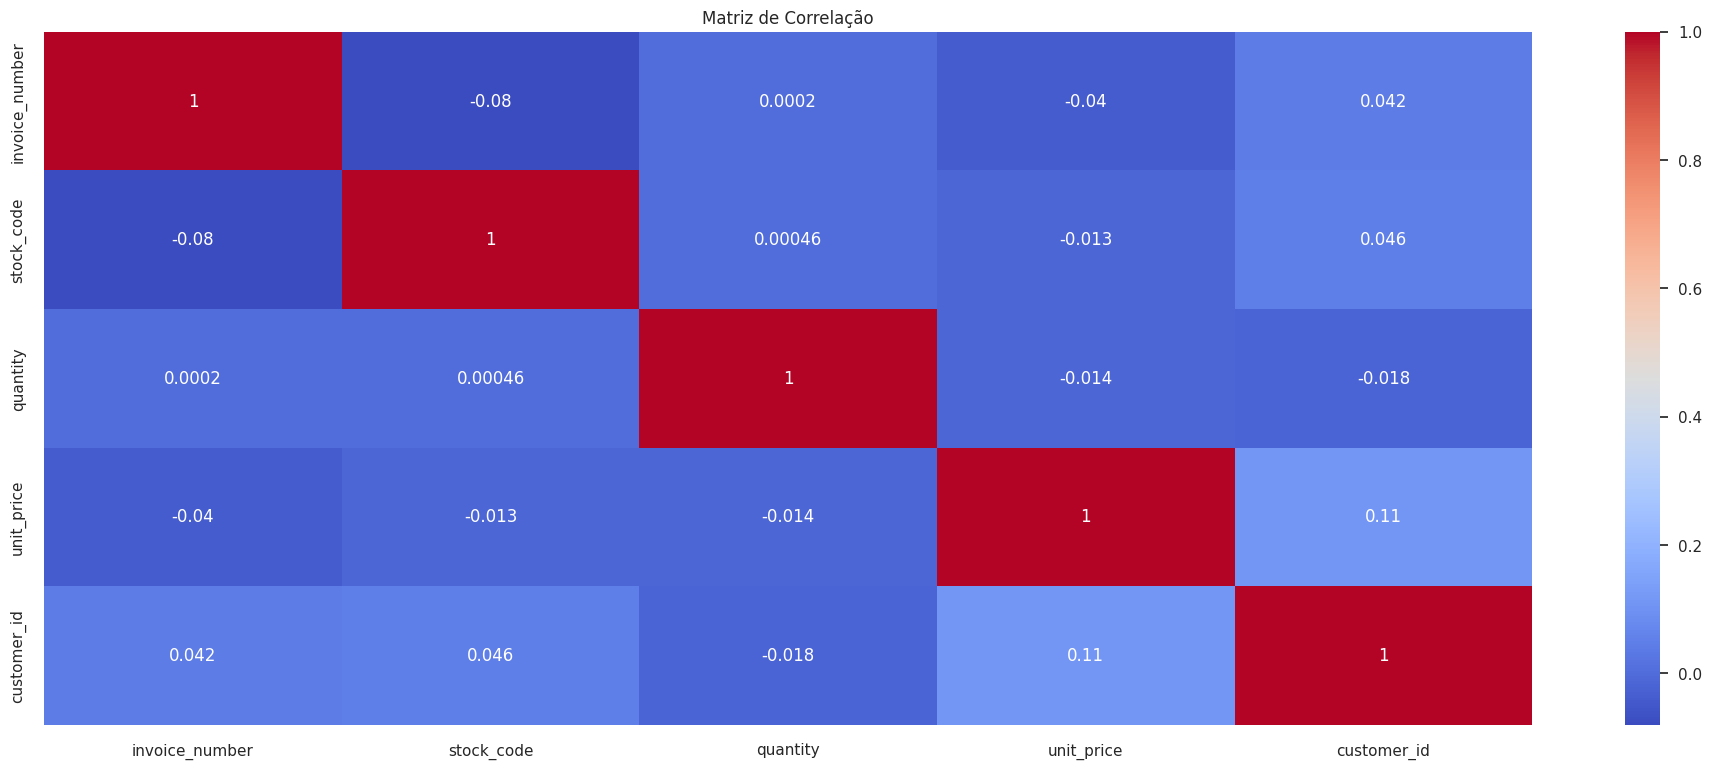

In [27]:
correlation_matrix = num_attributes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#### 4.5.1 - Investigação dos atributos numéricos
<p> Quantidade negativa pode ser devolução. </br>
Preço unitário igual a zero, pode ser brinde ou promoção.
</p>

### 4.5.2 - Atributos Categóricos

In [28]:
# Apply the lambda function to count the number of unique values in each categorical attribute
cat_attributes.apply(lambda x: x.unique().shape[0])

product_description    4211
invoice_date            305
country                  38
dtype: int64

# 5.0 - PASSO 5 - LIMPEZA E FILTRAGEM DAS VARIÁVEIS

In [29]:
df2 = df1.copy()

## 5.1 - Verificando a consistência dos dados

In [30]:
# Valores Duplicados
duplicated_rows = df2.duplicated()
print(f"Linhas duplicadas: {duplicated_rows.sum()}")

Linhas duplicadas: 5332


In [31]:
# Como as linhas duplicadas representa 1% do dataset, decidimos remove-las
df2 = df2.drop_duplicates()

In [32]:
# Quantidade de valores negativos em quantity e unit_price
negative_quantity = (df2['quantity'] < 0).sum()
negative_unit_price = (df2['unit_price'] < 0.04).sum()

print(f"Valores negativos em 'quantity': {negative_quantity}")
print(f"Valores negativos em 'unit_price': {negative_unit_price}")

Valores negativos em 'quantity': 9143
Valores negativos em 'unit_price': 1048


## 5.2 - Preparação dos dados em relação ao problema de negócio

In [33]:
# Garantindo que unit_price não seja negativo e seja maior que 0.04 cents.
# Não queremos que brindes sejam levados em conta no agrupamento.
df2 = df2[df2['unit_price'] >= 0.04]

In [34]:
# Dividindo a coluna quantity em duas: retornos e vendas.
df2_returns = df2[df2['quantity'] < 0].copy()
df2_purchases = df2[df2['quantity'] >= 0].copy()

In [35]:
# Agrupar por país e contar consumidores únicos
unique_countries = df2.groupby('country')['customer_id'].nunique().reset_index().sort_values(by='customer_id', ascending=False)
unique_countries

,country,customer_id
36,United Kingdom,5291
14,Germany,95
13,France,90
10,EIRE,39
31,Spain,30
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,14
12,Finland,12


In [36]:
# Tirando do dataset a coluna da descrição dos itens, pois não é relevante na resolução do problema de negócios
df2 = df2.drop(columns='product_description', axis=1)

In [37]:
# Retirar os países que possuem União Europeia e Não especificados
df2 = df2[~df2['country'].isin(['Eropean Community', 'Unspecified'])]

# 6.0 - ANÁLISE EXPLORATÓRIA

In [38]:
df3 = df2.copy()

In [39]:
df3.head()

,invoice_number,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123,6,2010-12-01,2.55,United Kingdom,17850.0
1,536365,71053,6,2010-12-01,3.39,United Kingdom,17850.0
2,536365,84406,8,2010-12-01,2.75,United Kingdom,17850.0
3,536365,84029,6,2010-12-01,3.39,United Kingdom,17850.0
4,536365,84029,6,2010-12-01,3.39,United Kingdom,17850.0


In [40]:
# Dropando as colunas desnecessárias para a Feature Engineering
# Deixando apenas o customer_id
df3_ref = df3.drop(['invoice_number', 'stock_code', 'quantity', 'unit_price', 'country', 'invoice_date'], axis=1).drop_duplicates(ignore_index=True)

## 6.1 - Criando novas variáveis

In [41]:
# Ideias de variáveis:
## Média Móvel - 7D, 14D, 30D do faturamento de cada cliente.
## Quantidade de compras por mês, antes do dia 15 e depois do dia 15.
## Média financeira.
## Quantidade de preços por cesta.
## Número de retornos por clientes

In [42]:
# 6.1.1 - Gross Revenue / Faturamento
df2_purchases['gross_revenue'] = df2_purchases['quantity'] * df2_purchases['unit_price']

# Monetary
df3_monetary = df2_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df3_ref = pd.merge(df3_ref, df3_monetary, on='customer_id', how='left')
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
dtype: int64

In [43]:
# 6.1.2 - Recency - Dias desde a última compra
df_recency = df2_purchases.groupby('customer_id')['invoice_date'].max().reset_index()
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df3_ref = pd.merge(df3_ref, df_recency, on='customer_id', how='left')
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
dtype: int64

In [44]:
# 6.1.3 - Quantidade de pedidos por consumidor
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_number']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_number': 'qtde_invoices'}) )
df3_ref = pd.merge( df3_ref, df_freq, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
dtype: int64

In [45]:
# 6.1.4 - Quantidade de itens comprados por consumidor
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df3_ref = pd.merge( df3_ref, df_freq, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
dtype: int64

In [46]:
# 6.1.5 - Ticket Médio
df_avg_ticket = df2_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df3_ref = pd.merge(df3_ref, df_avg_ticket, on='customer_id', how='left')
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
avg_ticket       67
dtype: int64

In [47]:
# 6.1.6 - Media de compras por dias
df_aux = df3[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending=[False, False])
df_aux['next_customer_id'] = df_aux['customer_id'].shift()  # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift()  # next invoice date

df_aux['avg_recency_days'] = df_aux.apply(
    lambda x: (x['invoice_date'] - x['previous_date']).days if pd.notnull(x['next_customer_id']) and x['customer_id'] == x['next_customer_id'] else np.nan,
    axis=1
)

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df3_ref = pd.merge( df3_ref, df_avg_recency_days, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
dtype: int64

In [48]:
# 6.1.7 - Frequencia de compras por dias
df_aux = ( df2_purchases[['customer_id', 'invoice_number', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_number', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df3_ref = pd.merge( df3_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
dtype: int64

In [49]:
# 6.1.8 - Quantidade de produtos únicos por clientes
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df3_ref = pd.merge( df3_ref, df_freq, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
qtde_products         67
dtype: int64

In [50]:
# 6.1.9 - Número de retornos por clientes
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df3_ref = pd.merge( df3_ref, df_returns, how='left', on='customer_id' )
df3_ref.loc[df3_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
qtde_products         67
qtde_returns           0
dtype: int64

In [51]:
# 6.1.10 - Quantidades de itens por cesta
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_number', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_number', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df3_ref = pd.merge( df3_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
qtde_products         67
qtde_returns           0
avg_basket_size       67
dtype: int64

In [52]:
# 6.1.11 - Quantidade de produtos distintos por compra
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_number', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_number', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df3_ref = pd.merge( df3_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df3_ref.isna().sum()

customer_id                  0
gross_revenue               67
recency_days                67
qtde_invoices               67
qtde_items                  67
avg_ticket                  67
avg_recency_days          2794
frequency                   67
qtde_products               67
qtde_returns                 0
avg_basket_size             67
avg_unique_basket_size      67
dtype: int64

In [53]:
df3_ref.head(5)

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850.0,5391.21,372.0,34,1733.0,18.152222,-35.500000,17.000000,297,37.0,50.970588,0.588235
1,13047.0,3232.59,56.0,9,1390.0,18.904035,-27.250000,0.028302,171,35.0,154.444444,11.666667
2,12583.0,6705.38,2.0,15,5028.0,28.902500,-23.187500,0.040323,232,50.0,335.200000,7.600000
3,13748.0,948.25,95.0,5,439.0,33.866071,-92.666667,0.017921,28,0.0,87.800000,4.800000
4,15100.0,876.00,333.0,3,80.0,292.000000,-8.600000,0.073171,3,22.0,26.666667,0.333333


## 6.3 - Análise Univarida

In [54]:
df4 = df3_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_products             0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

In [55]:
##


##

## 6.4 - Análise Bivariada

In [56]:
##


##

# 7.0 - PREPARAÇÃO DOS DADOS

In [57]:
df5 = df4.copy()

In [58]:
df5.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'avg_ticket', 'avg_recency_days', 'frequency',
       'qtde_products', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [59]:
## Standard Scalaer
ss = pp.MinMaxScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']] )
df5['recency_days'] = ss.fit_transform( df5[['recency_days']] )
df5['qtde_invoices'] = ss.fit_transform( df5[['qtde_invoices']] )
df5['qtde_items'] = ss.fit_transform( df5[['qtde_items']] )
df5['qtde_products'] = ss.fit_transform( df5[['qtde_products']] )
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']] )
df5['avg_recency_days'] = ss.fit_transform( df5[['avg_recency_days']] )
df5['frequency'] = ss.fit_transform( df5[['frequency']] )
df5['qtde_returns'] = ss.fit_transform( df5[['qtde_returns']] )
df5['avg_basket_size'] = ss.fit_transform( df5[['avg_basket_size']] )
df5['avg_unique_basket_size'] = ss.fit_transform( df5[['avg_unique_basket_size']] )

# 8.0 - SELEÇÃO DE VARIÁVEIS

In [60]:
df6 = df5.copy()

In [61]:
##


##

# 9.0 - HIPER PARÂMETROS - FINE TUNING

In [62]:
df7 = df6.copy()

In [63]:
X = df7.drop( columns=['customer_id'] )

In [64]:
X.head()

,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
0,0.019292,0.997319,0.160976,0.008794,0.000285,0.905479,1.000000,0.038622,0.000457,0.001234,0.001506
1,0.011559,0.150134,0.039024,0.007051,0.000298,0.928082,0.001345,0.022182,0.000432,0.003789,0.044479
2,0.024000,0.005362,0.068293,0.025533,0.000476,0.939212,0.002052,0.030141,0.000617,0.008252,0.028704
3,0.003375,0.254692,0.019512,0.002220,0.000565,0.748858,0.000734,0.003523,0.000000,0.002143,0.017843
4,0.003116,0.892761,0.009756,0.000396,0.005162,0.979178,0.003985,0.000261,0.000272,0.000634,0.000517


In [65]:
clusters = [2, 3, 4, 5, 6, 7]

## 9.1 - WSS - Within-Cluster Sum of Square

In [66]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Bitstream Vera Sans', 'Arial', 'sans-serif']

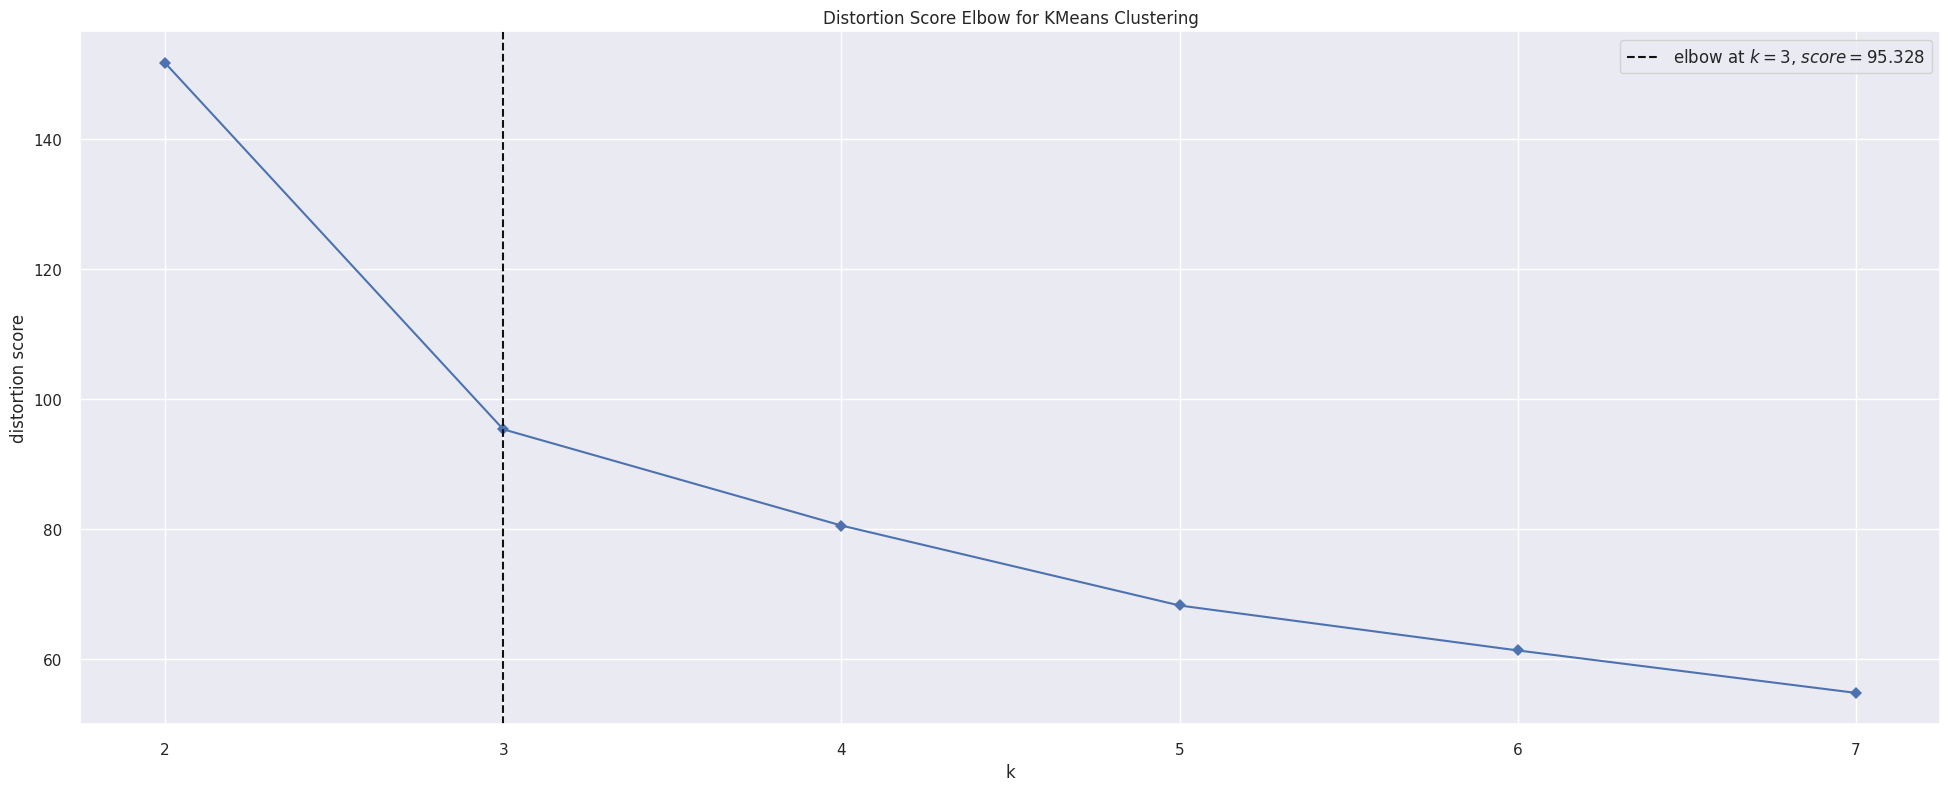

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
# Definindo o número de clusters
wss = []

for k in clusters:
    # Definindo o modelo K-means
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # Treinando o modelo
    kmeans.fit(X)

    # Calculando o Within-Cluster Sum of Squares (WSS) e adicionando à lista
    wss.append(kmeans.inertia_)

# Visualizando o método do cotovelo com Yellowbrick
kmeans_visualizer = KElbowVisualizer(KMeans(init='random', n_init=10, max_iter=300, random_state=42), k=clusters, timings=False)
kmeans_visualizer.fit(X)
kmeans_visualizer.show()

## 9.2 - Sillhouete Score

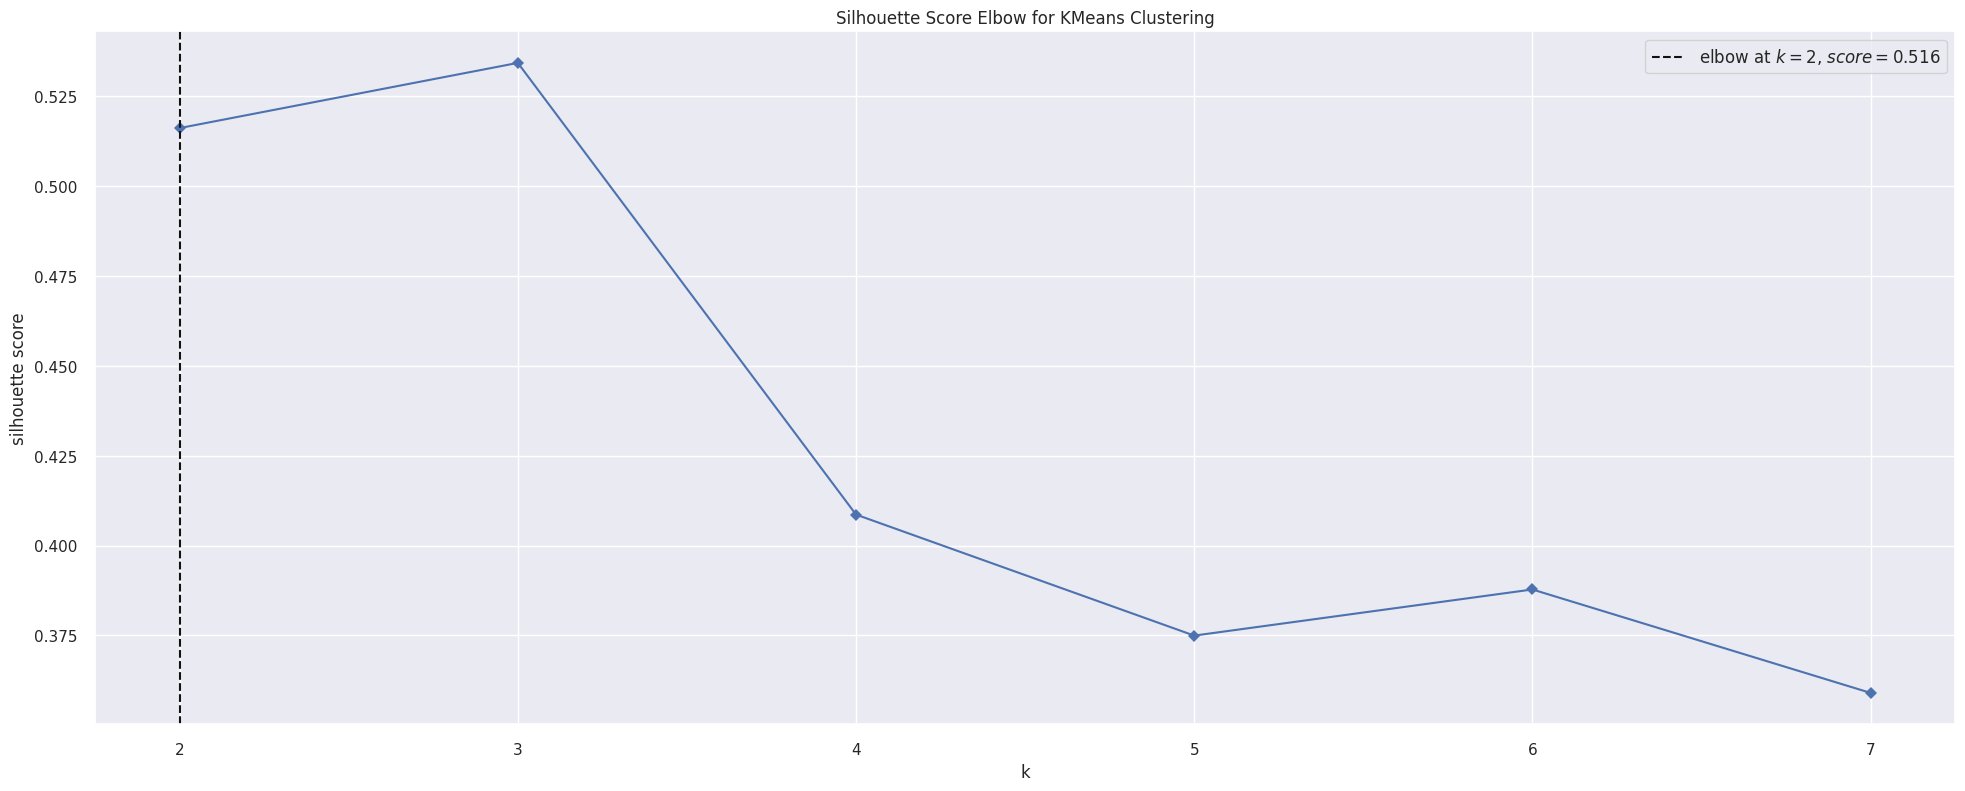

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [68]:
kmeans = KElbowVisualizer( KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

### 9.2.1 - SS Analysis

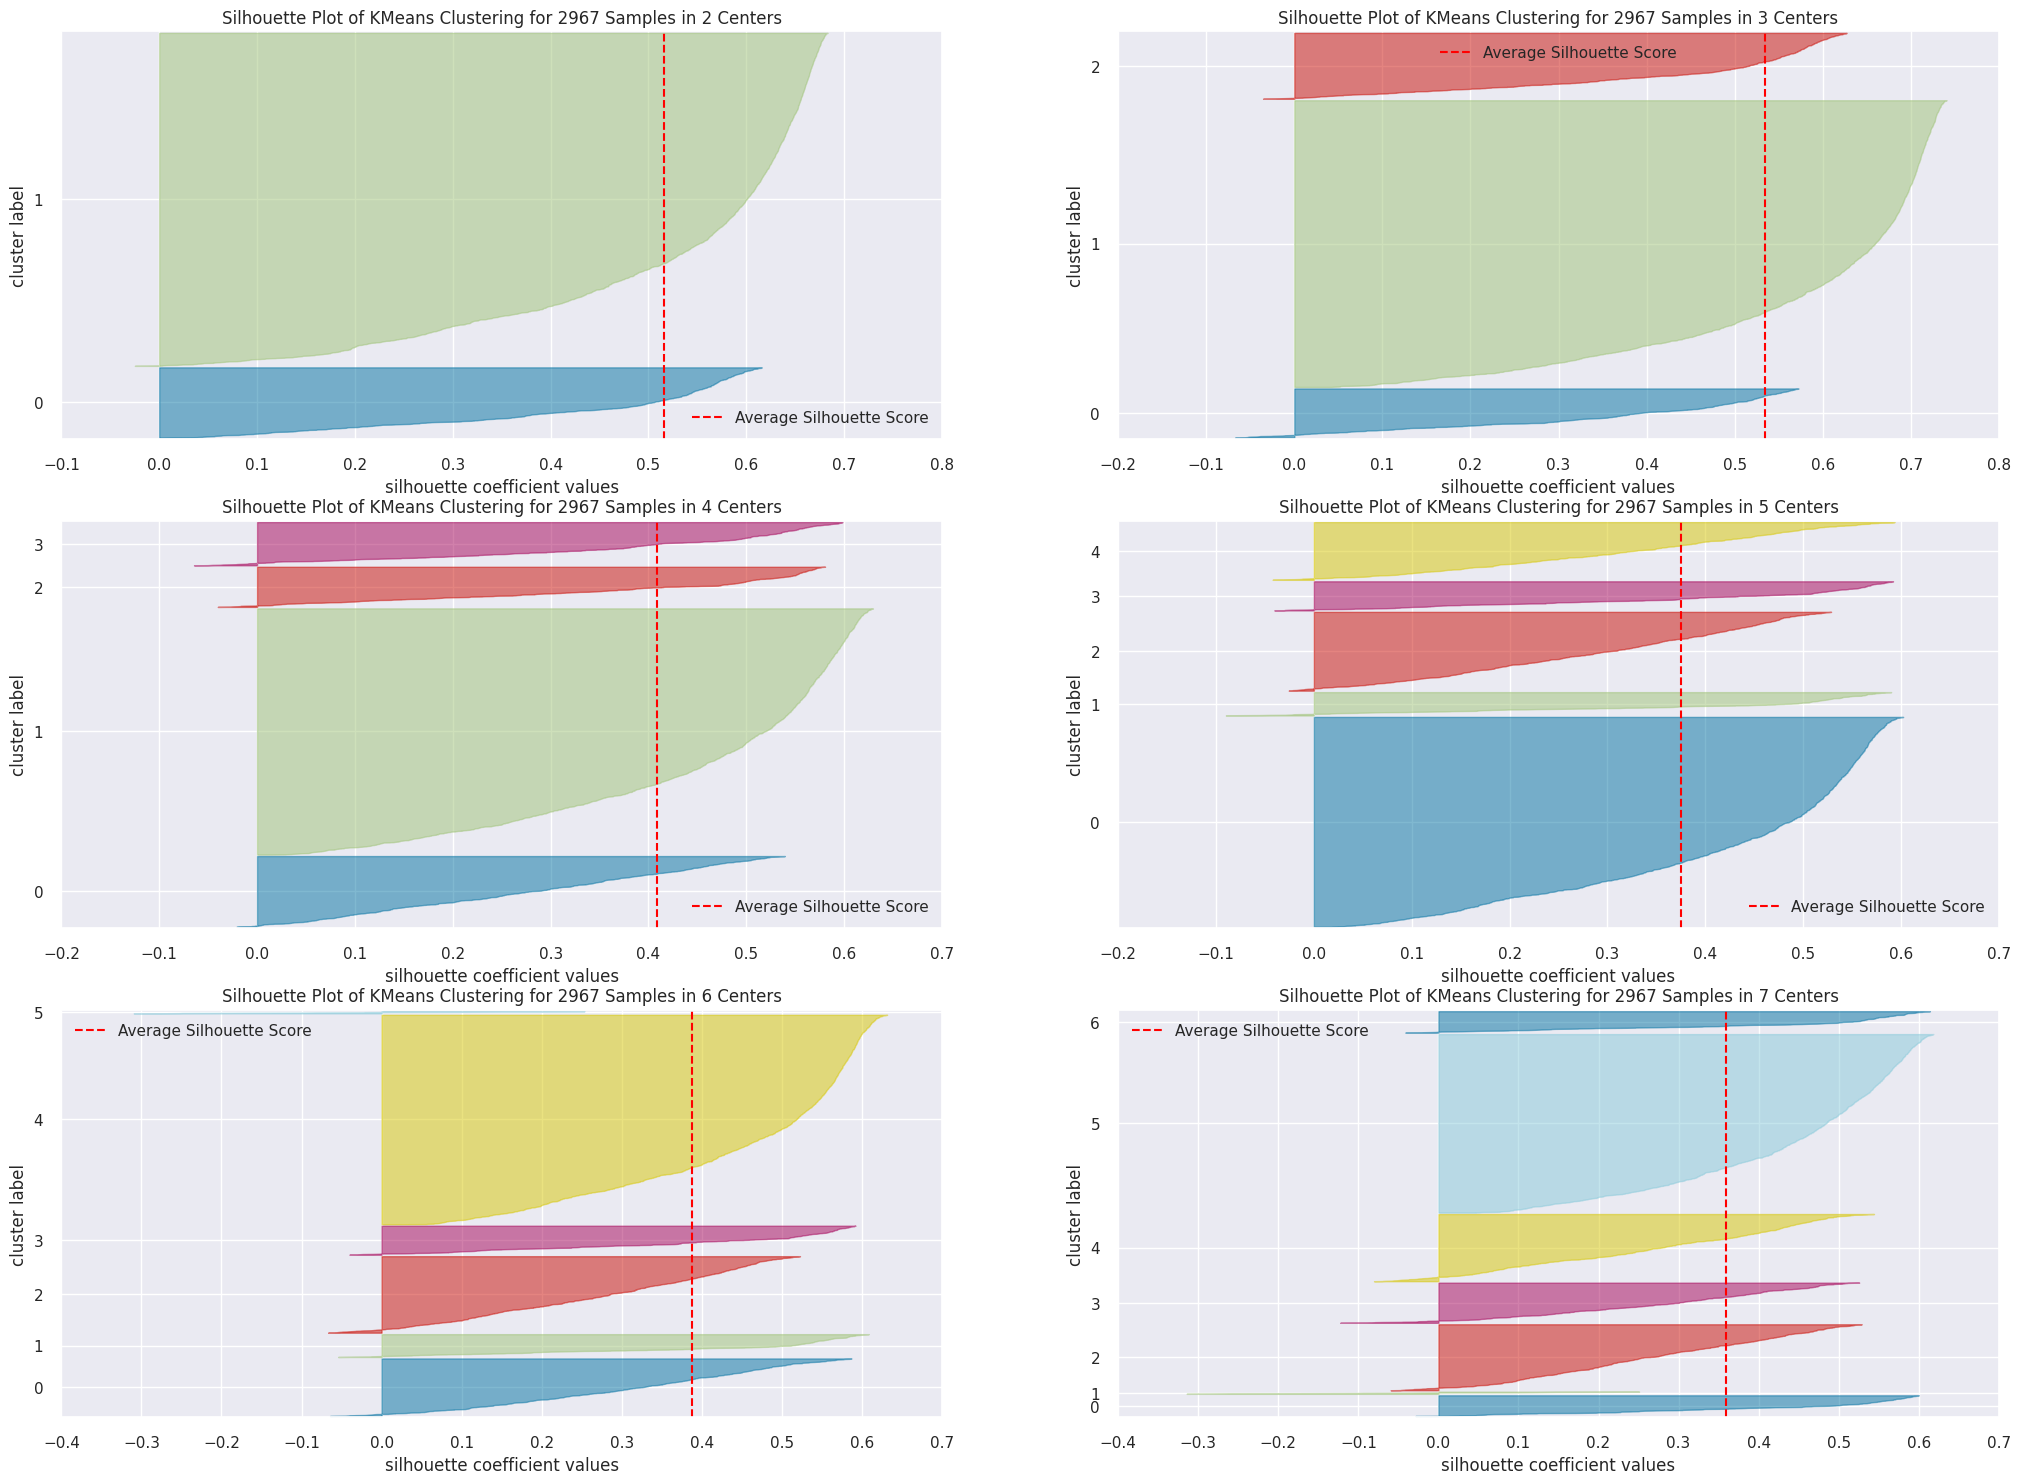

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()


# 10.0 - TREINANDO O MODELO - COM O MELHOR PARÂMETRO

## 10.1 - K-Means

In [70]:
k = 3
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit( X )
labels = kmeans.labels_

## 10.2 - Cluster Validation

In [71]:
# Cluster Validation
silhouette = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {silhouette}')

print( 'WSS value: {}'.format( kmeans.inertia_ ) )

Silhouette Score: 0.5342912684315598
WSS value: 95.32769125854645


## 10.3 - Cluster Analysis

In [72]:
# Cluster Analysis
df8 = df7.copy()
df8['cluster'] = labels
df8.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850.0,0.019292,0.997319,0.160976,0.008794,0.000285,0.905479,1.000000,0.038622,0.000457,0.001234,0.001506,2
1,13047.0,0.011559,0.150134,0.039024,0.007051,0.000298,0.928082,0.001345,0.022182,0.000432,0.003789,0.044479,1
2,12583.0,0.024000,0.005362,0.068293,0.025533,0.000476,0.939212,0.002052,0.030141,0.000617,0.008252,0.028704,1
3,13748.0,0.003375,0.254692,0.019512,0.002220,0.000565,0.748858,0.000734,0.003523,0.000000,0.002143,0.017843,1
4,15100.0,0.003116,0.892761,0.009756,0.000396,0.005162,0.979178,0.003985,0.000261,0.000272,0.000634,0.000517,2


## 10.4 - Inspeção Visual

/home/emersds/.pyenv/versions/3.12.3/envs/env_insiders/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


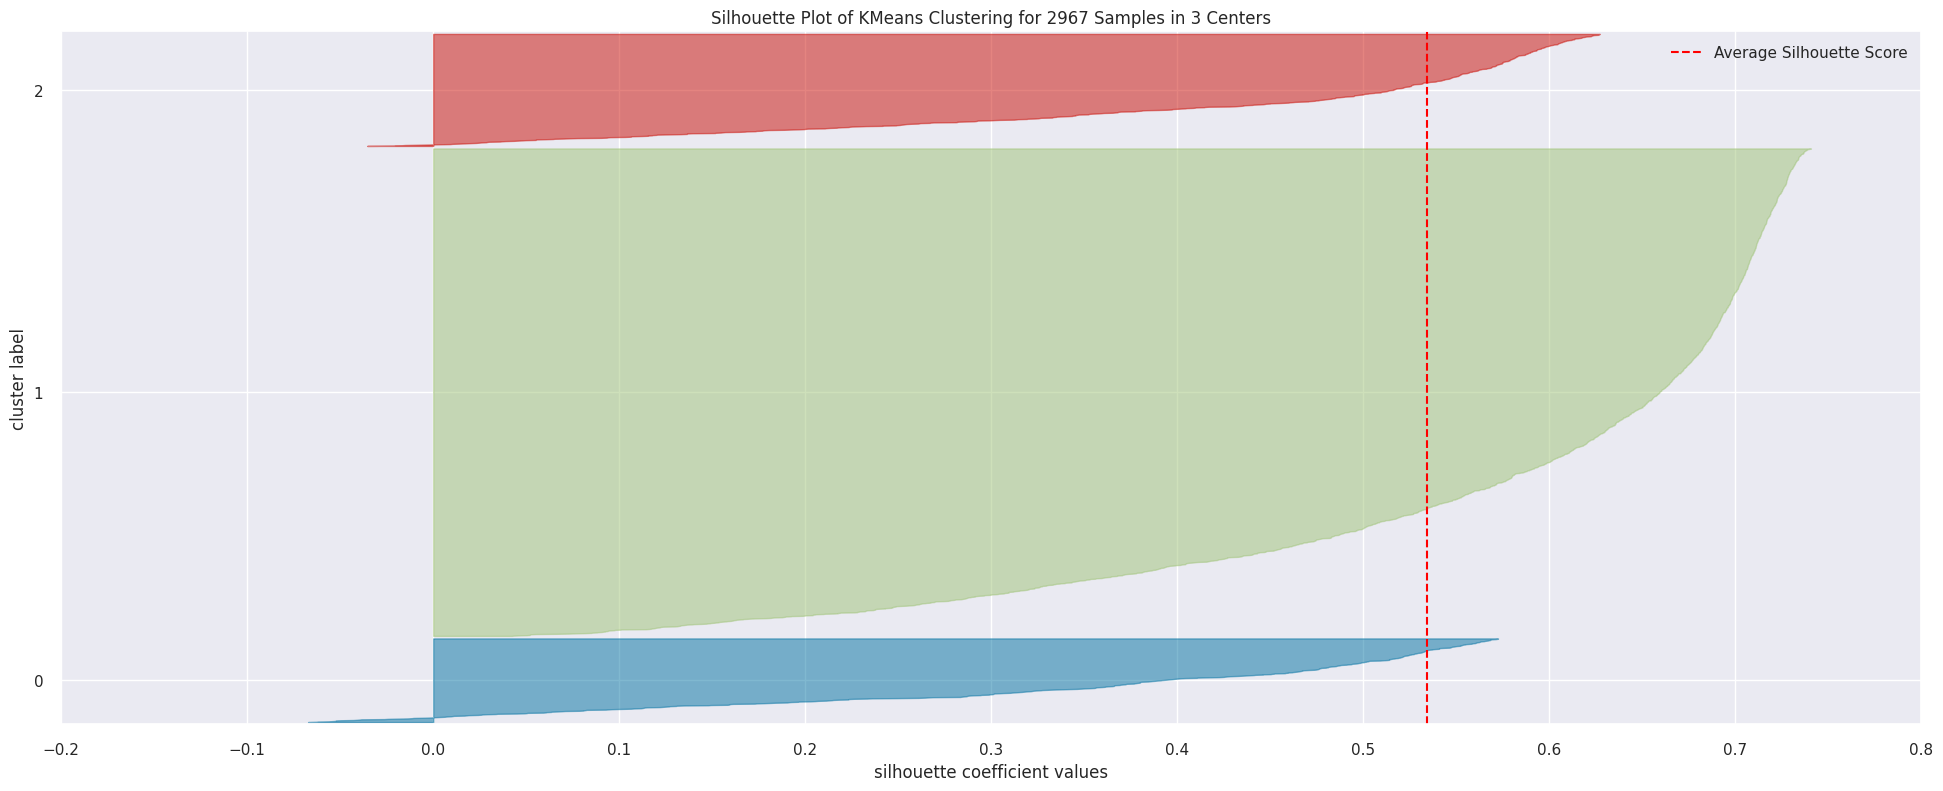

In [73]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

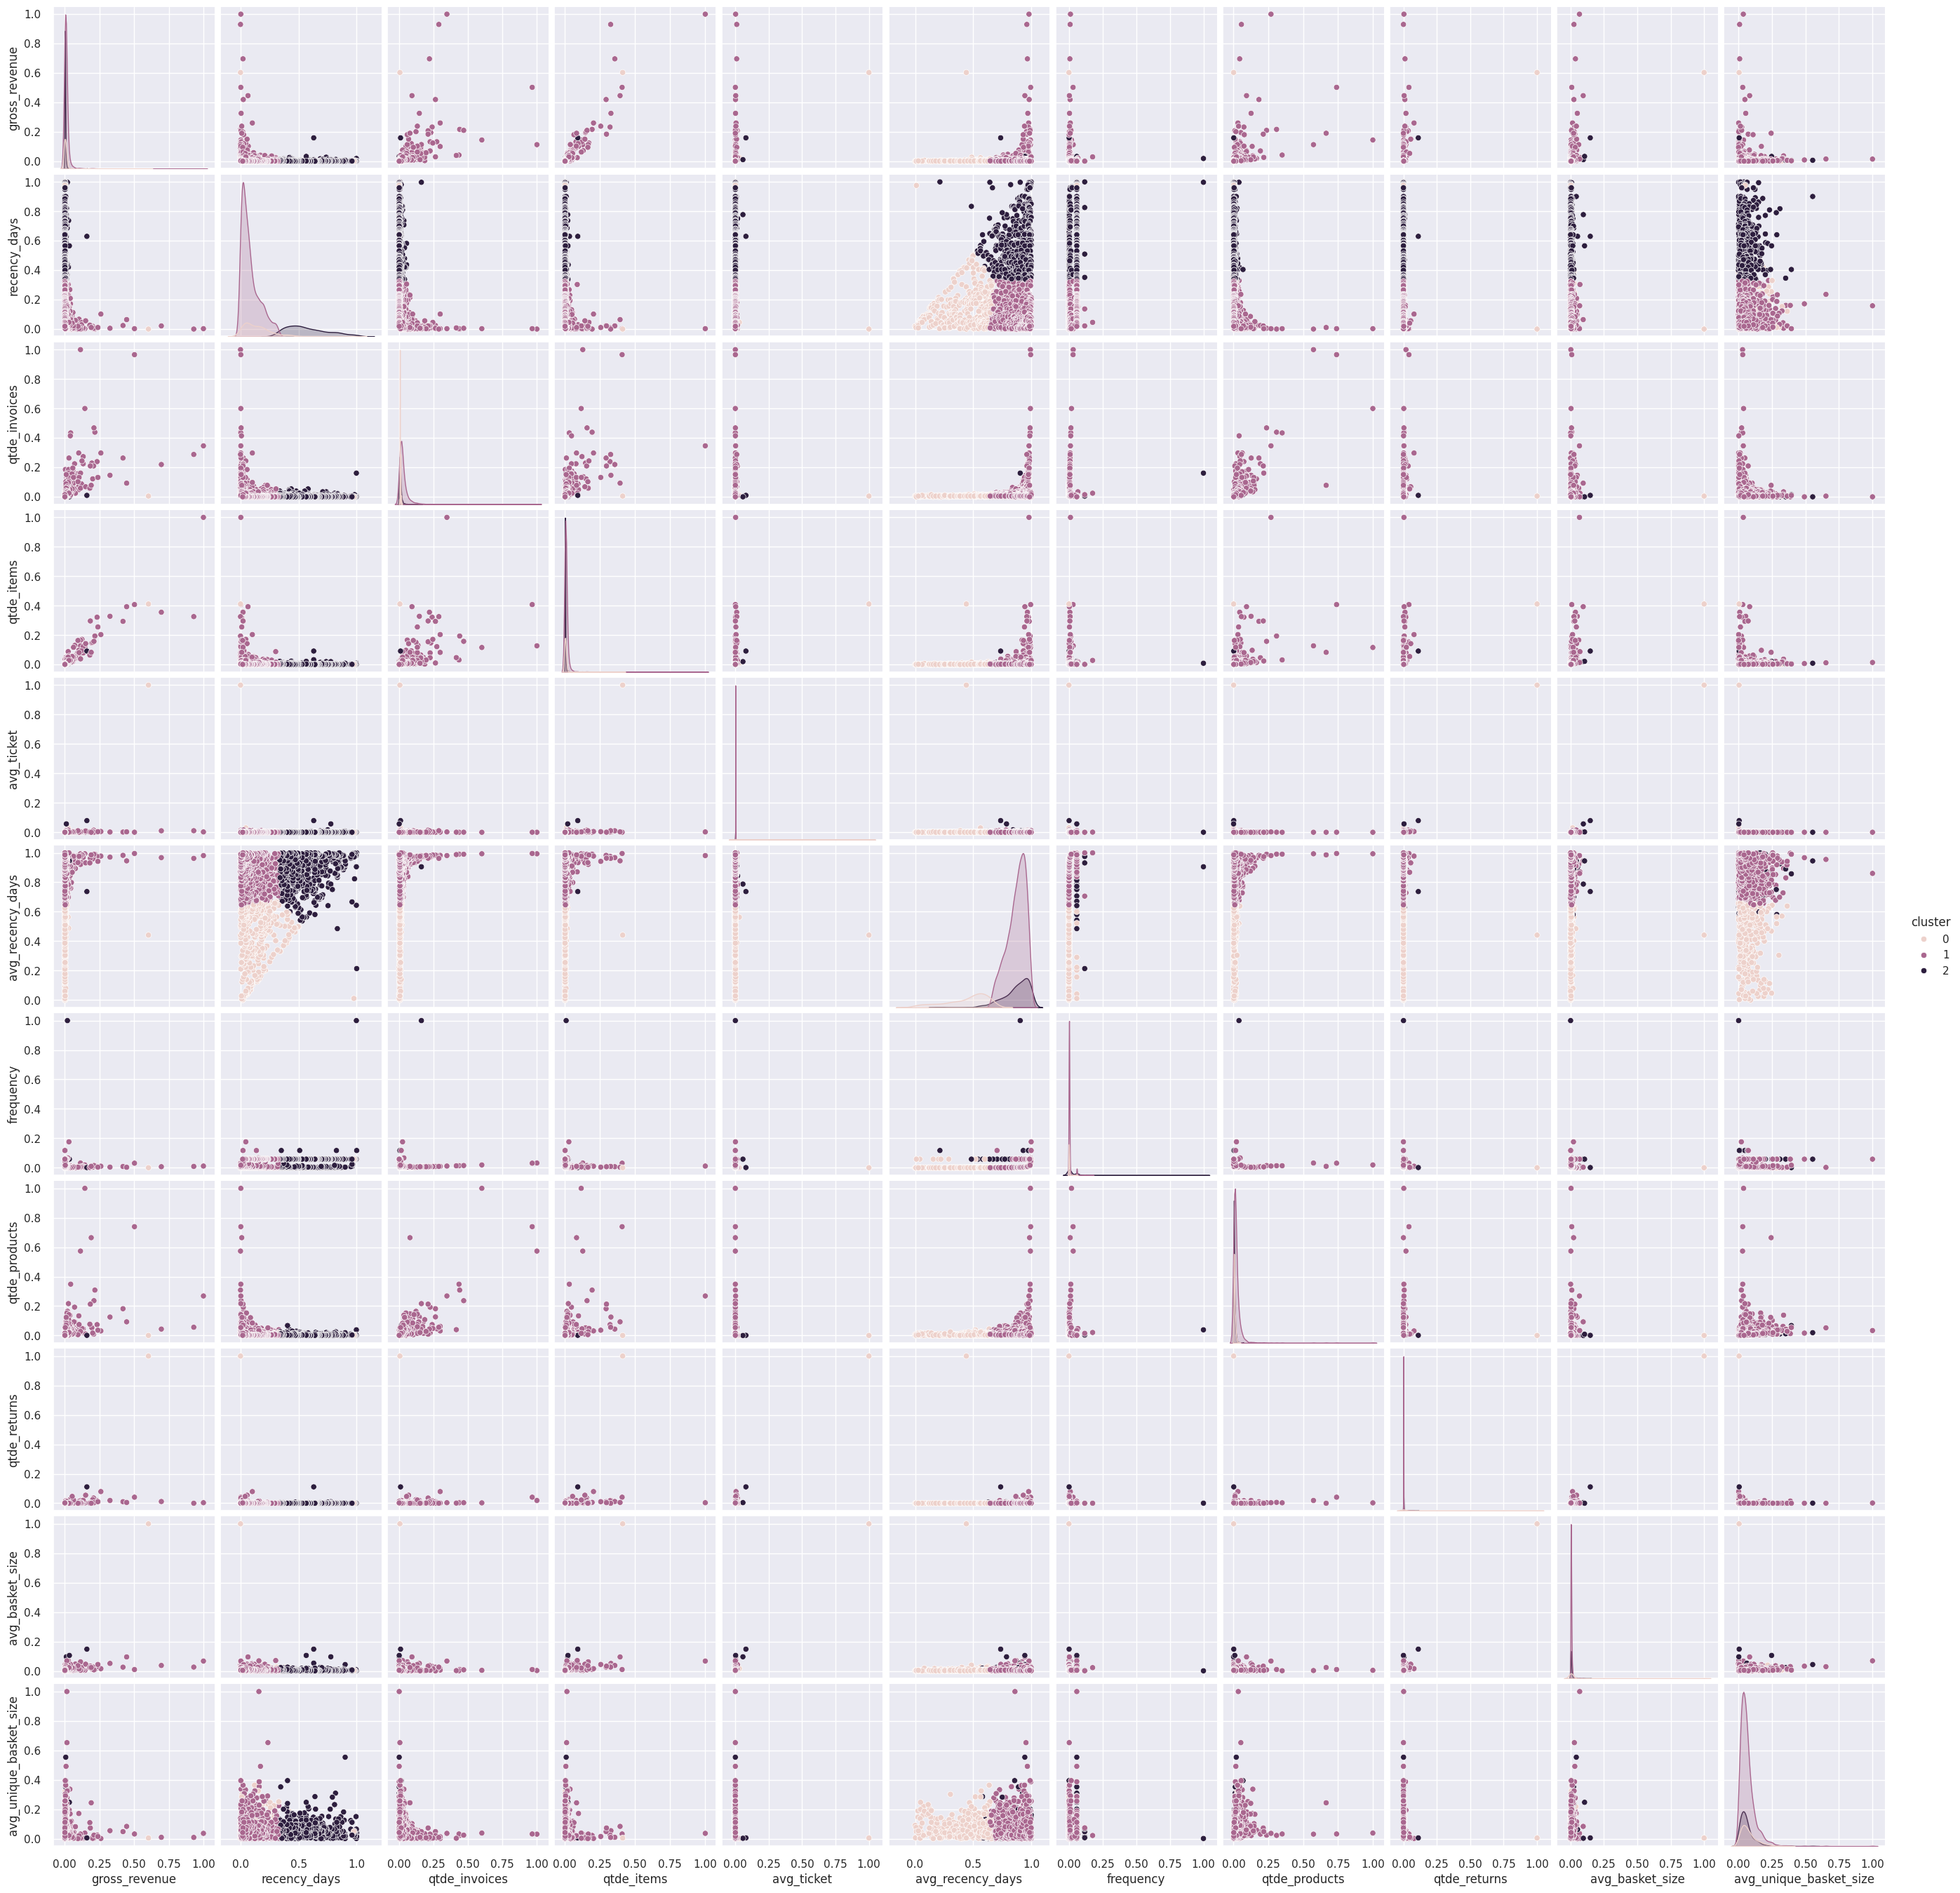

In [74]:
# 2dplot
df_viz = df8.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster' )

/home/emersds/.pyenv/versions/3.12.3/envs/env_insiders/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

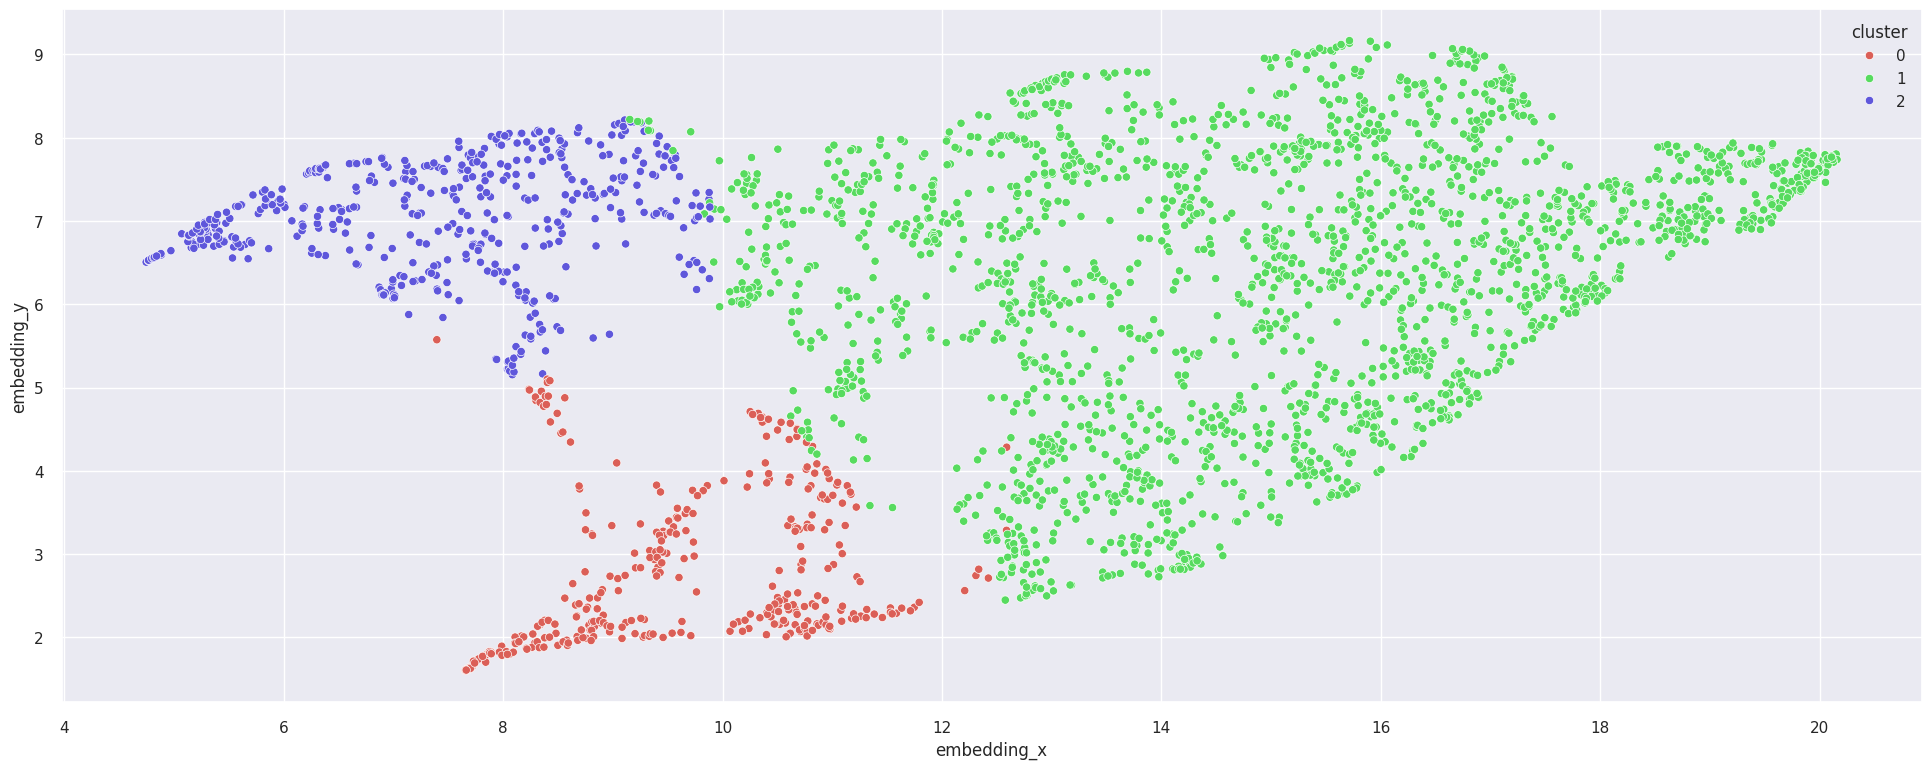

In [75]:
# UMAP
reducer = umap.UMAP( n_neighbors=80, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', 
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
                 data=df_viz )

## 10.5 - Cluster Profile

In [76]:
df8.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850.0,0.019292,0.997319,0.160976,0.008794,0.000285,0.905479,1.000000,0.038622,0.000457,0.001234,0.001506,2
1,13047.0,0.011559,0.150134,0.039024,0.007051,0.000298,0.928082,0.001345,0.022182,0.000432,0.003789,0.044479,1
2,12583.0,0.024000,0.005362,0.068293,0.025533,0.000476,0.939212,0.002052,0.030141,0.000617,0.008252,0.028704,1
3,13748.0,0.003375,0.254692,0.019512,0.002220,0.000565,0.748858,0.000734,0.003523,0.000000,0.002143,0.017843,1
4,15100.0,0.003116,0.892761,0.009756,0.000396,0.005162,0.979178,0.003985,0.000261,0.000272,0.000634,0.000517,2


In [78]:
# Number of customer
df_cluster = df8[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df8[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df8[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# # Avg invoice_number
# df_invoice_number = df8[['invoice_number', 'cluster']].groupby( 'cluster' ).mean().reset_index()
# df_cluster = pd.merge( df_cluster, df_invoice_number, how='inner', on='cluster' )

# Avg Ticket
df_ticket = df8[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,avg_ticket
0,0,364,12.268284,0.004254,0.142592,0.003246
1,1,2116,71.317829,0.012267,0.084848,0.000487
2,2,487,16.413886,0.003277,0.573677,0.000862


### Cluster 01:  ( Candidato a Líderes dos Insiders )
    - Número de customers: 3 (0.068% do customers )
    - Recência em média: 3 dias
    - Compras em média: 65 compras
    - Receita em média: $241.136,56 dólares
        
### Cluster 02: 
    - Número de customers: 15 (0.34% do customers )
    - Recência em média: 7 dias
    - Compras em média: 68 compras
    - Receita em média: $71.423,52 dólares
        
### Cluster 0: 
    - Número de customers: 38 (0.87% do customers )
    - Recência em média: 13 dias
    - Compras em média: 43 compras
    - Receita em média: $23.181,92 dólares

# 11.0 - DEPLOY EM PRODUÇÃO

In [ ]:
##


##